In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets=['ABEV3.SA','ITUB4.SA']
data=pd.DataFrame()

In [3]:
for i in assets:
    data[i]=wb.DataReader(i, data_source='yahoo', start='2010-1-1')['Adj Close']
data.tail()

,ABEV3.SA,ITUB4.SA
Date,,
2020-04-03,11.39,20.66
2020-04-06,11.86,22.18
2020-04-07,12.41,23.00
2020-04-08,12.31,24.18
2020-04-09,12.10,23.50


In [4]:
incres=np.log(data/data.shift(1))
return_year=incres.mean()*252
return_year

ABEV3.SA    0.153351
ITUB4.SA    0.051340
dtype: float64

In [5]:
incres.cov()*252

,ABEV3.SA,ITUB4.SA
ABEV3.SA,0.066693,0.033347
ITUB4.SA,0.033347,0.097412


In [6]:
incres.corr()

,ABEV3.SA,ITUB4.SA
ABEV3.SA,1.000000,0.412641
ITUB4.SA,0.412641,1.000000


In [48]:
pfolio_return=[]
pfolio_vol=[]

for x in range(1000):
    prop=np.random.random(2)
    prop/=np.sum(prop)
    pfolio_return.append(np.sum((prop*incres.mean())*252))
    pfolio_vol.append(np.sqrt(np.dot(prop.T,np.dot(incres.cov()*252,prop))))

pfolio_return=np.array(pfolio_return)
pfolio_vol=np.array(pfolio_vol)

In [49]:
len(pfolio_return),len(pfolio_vol)

(1000, 1000)

In [50]:
pfolio={'Return':pfolio_return, 'Volatility':pfolio_vol}
pfolio=pd.DataFrame(pfolio)
pfolio.tail()

,Return,Volatility
995,0.117793,0.235121
996,0.090849,0.249798
997,0.086304,0.254832
998,0.141508,0.245487
999,0.123202,0.235566


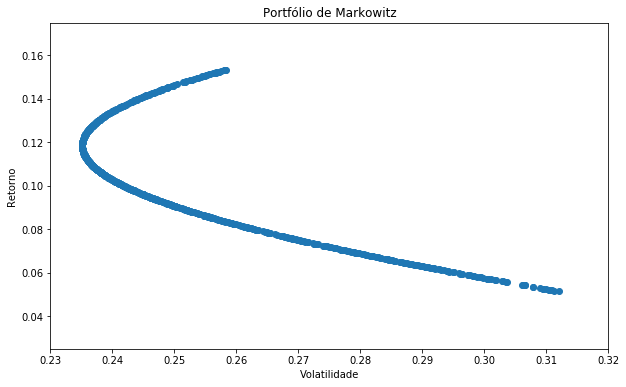

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(pfolio['Volatility'],pfolio['Return'])
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.title('Portfólio de Markowitz')
plt.axis([0.23,0.32,0.025,0.175])
plt.show()